# Data interpolation

We have some data for the refractive index for gold, silver and water depending on the frequency. This data is provided for only a range og frequencies. Therefore, we need to interpolate the data to obtain values in different ranges.

Christopher Cooper used his own script to interpolate, and obtain certain values. I want to use numpy interpolation and compare. Besides, he used linear interpolation without checking if the trend is linear. We will check the trend and plan the interpolation based on the trending.

The raw data was obtained from the following papers:

* Silver and gold: [Johnson and Christy, 1972](http://fisica.ufpr.br/jfreire/EstadoSolido/optical%20contstants%20of%20noble%20metals.pdf)

* Water: [Hale and Querry, 1973](https://www.osapublishing.org/DirectPDFAccess/CAEC33D7-D5FA-10D2-3295270420D245D3_17737/ao-12-3-555.pdf?da=1&id=17737&seq=0&mobile=no)

In [1]:
import numpy 
from matplotlib import pyplot
%matplotlib inline

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [3]:
#Importing gold data
#Format: wavelength, refrac_index_real (n), refrac_index_complex (k) 

lambda_g , n_g , k_g = numpy.loadtxt('gold_silver_water_raw-data/gold_JC72.txt', unpack=True)
lambda_g = lambda_g*1e3 #To convert to nm


In [4]:
min(lambda_g)

187.90000000000001

In [5]:
max(lambda_g)

1937.0

In [93]:
def plot_refrac(lamb, n, k):
    
    """
    Plots the trend of the refractive index with the wavelength.
    Plots separately the real and imaginary part of the refractive index.
    
    Arguments:
    ----------
    lamb: array, wavelengths.
    n   : array, real part of refractive index. 
    k   : array, imaginary part of refractive index.
    
    Returns:
    --------
    Plots of refrac_index_real vs lambda, refrac_index_imaginary vs lambda. 
    """
    
    pyplot.figure(figsize=(12,4))  

    pyplot.subplot(121)
    
    pyplot.scatter(lamb,n, color='#2929a3') 
    
    pyplot.xlabel('Wavelength [nm]')
    pyplot.ylabel('Refractive index')
    pyplot.xlim(min(lamb)-5, max(lamb)+5)
    pyplot.xticks(numpy.linspace(min(lamb), max(lamb), 10), rotation=75)
    pyplot.title('Real')
    pyplot.grid()
    
    
    pyplot.subplot(122)
    
    pyplot.scatter(lamb,k, color='#ff5733') 
    
    pyplot.xlabel('Wavelength [nm]')
    #pyplot.ylabel('Refractive index')
    pyplot.xlim(min(lamb)-5, max(lamb)+5)
    pyplot.xticks(numpy.linspace(min(lamb), max(lamb), 10), rotation=75)
    pyplot.title('Imaginary')
    pyplot.grid()

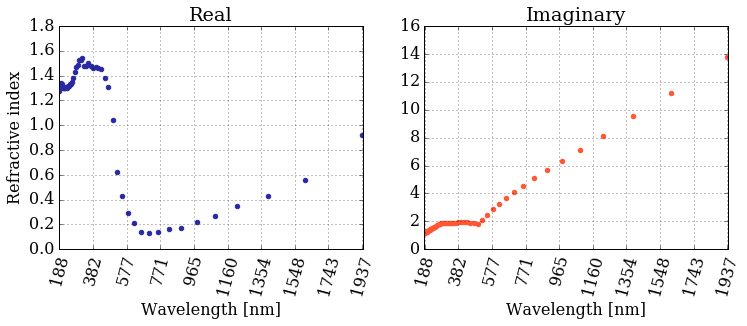

In [94]:
plot_refrac(lambda_g, n_g, k_g)

In [95]:
lambda_g[32:37]

array([ 471.4,  495.9,  520.9,  548.6,  582.1])

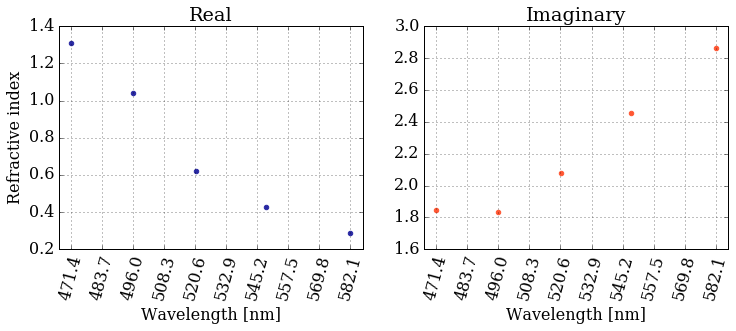

In [96]:
#In the range chris plot the wavelength for gold (460-560 nm)
plot_refrac(lambda_g[32:37], n_g[32:37], k_g[32:37])

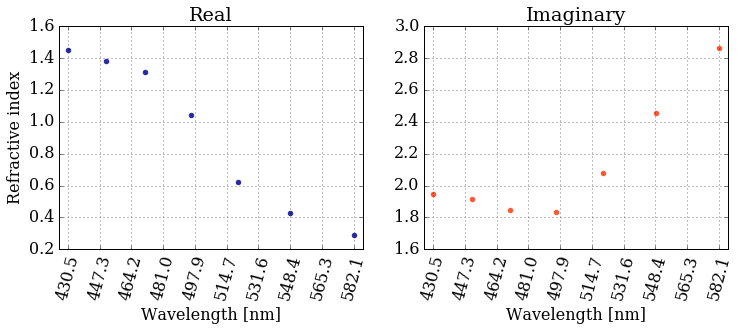

In [97]:
#In the range chris plot the wavelength for gold (460-560 nm)
plot_refrac(lambda_g[30:37], n_g[30:37], k_g[30:37])

In [98]:
#Importing silver data
#Format: wavelength, refrac_index_real (n), refrac_index_complex (k) 

lambda_s , n_s , k_s = numpy.loadtxt('gold_silver_water_raw-data/silver_JC72.txt', unpack=True)
lambda_s = lambda_s*1e3 #To convert to nm

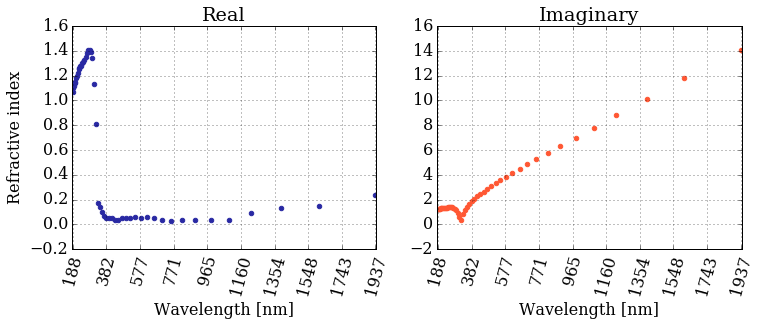

In [99]:
plot_refrac(lambda_s, n_s, k_s)

In [100]:
lambda_s[25:30]

array([ 354.2,  367.9,  381.5,  397.4,  413.3])

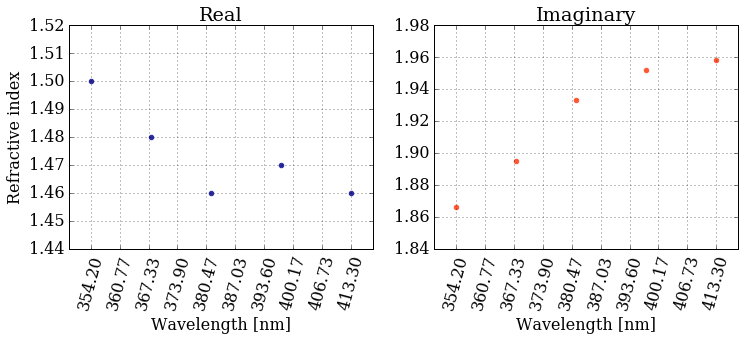

In [101]:
#In the range chris plot the wavelength for silver (350-420 nm)
plot_refrac(lambda_g[25:30], n_g[25:30], k_g[25:30])

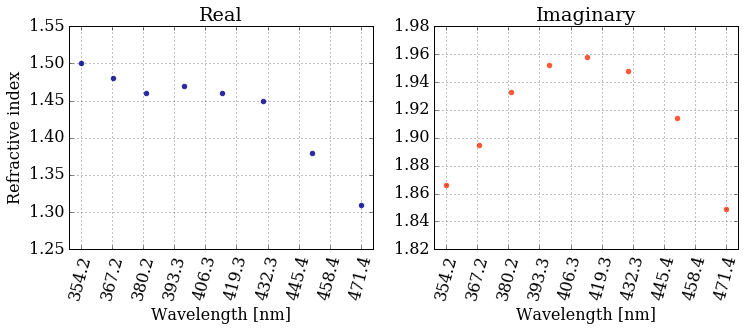

In [102]:
#Extending a bit the range plot the wavelength for silver (350-420 nm)
plot_refrac(lambda_g[25:33], n_g[25:33], k_g[25:33])

In [103]:
#Importing water data
#Format: wavelength, refrac_index_real (n), refrac_index_complex (k) 

lambda_w , n_w , k_w = numpy.loadtxt('gold_silver_water_raw-data/water_HQ72.txt', unpack=True)
lambda_w = lambda_w*1e3 #To convert to nm

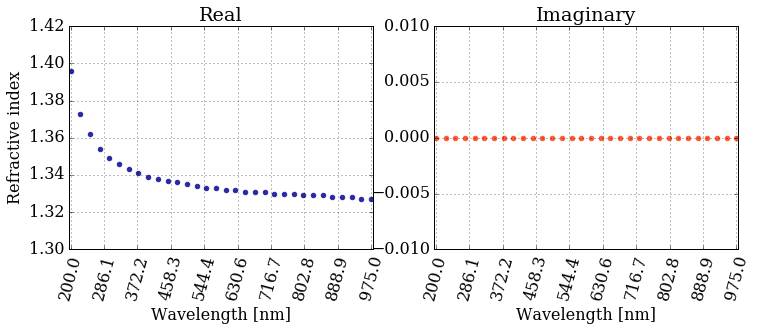

In [104]:
plot_refrac(lambda_w, n_w, k_w)

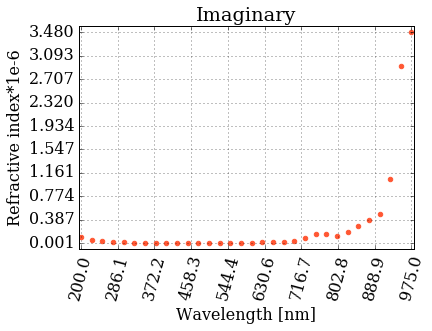

In [173]:
pyplot.scatter(lambda_w,k_w*1e6, color='#ff5733') 
    
pyplot.xlabel('Wavelength [nm]')
pyplot.ylabel('Refractive index*1e-6')
pyplot.xlim(min(lambda_w)-5, max(lambda_w)+5)
pyplot.ylim(min(k_w*1e6)-0.1, max(k_w*1e6)+0.1)
pyplot.yticks(numpy.linspace(min(k_w)*1e6, max(k_w)*1e6, 10))
pyplot.xticks(numpy.linspace(min(lambda_w), max(lambda_w), 10), rotation=75)
pyplot.title('Imaginary')
pyplot.grid()

In [174]:
lambda_w[10:15]

array([ 450.,  475.,  500.,  525.,  550.])

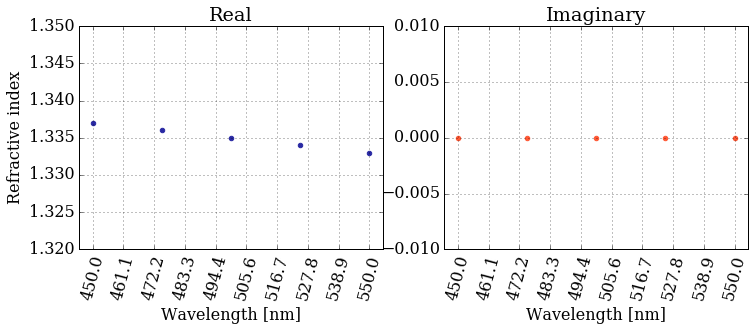

In [175]:
#In the range chris plot the wavelength for gold-water (460-560 nm)
plot_refrac(lambda_w[10:15], n_w[10:15], k_w[10:15])

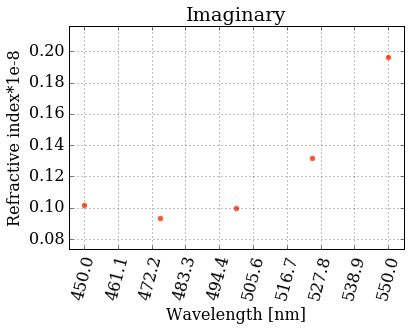

In [178]:
pyplot.scatter(lambda_w[10:15],k_w[10:15]*1e8, color='#ff5733') 
    
pyplot.xlabel('Wavelength [nm]')
pyplot.ylabel('Refractive index*1e-8')
pyplot.xlim(min(lambda_w[10:15])-5, max(lambda_w[10:15])+5)
pyplot.ylim(min(k_w[10:15]*1e8)-0.02, max(k_w[10:15]*1e8)+0.02)
#pyplot.yticks(numpy.linspace(min(k_w[10:15])*1e6, max(k_w[10:15])*1e6, 10))
pyplot.xticks(numpy.linspace(min(lambda_w[10:15]), max(lambda_w[10:15]), 10), rotation=75)
pyplot.title('Imaginary')
pyplot.grid()

In [180]:
lambda_w[5:10]

array([ 325.,  350.,  375.,  400.,  425.])

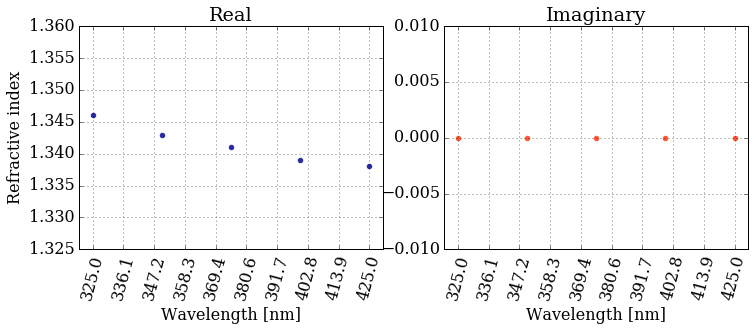

In [181]:
#In the range chris plot the wavelength for silver-water (350-420 nm)
plot_refrac(lambda_w[5:10], n_w[5:10], k_w[5:10])

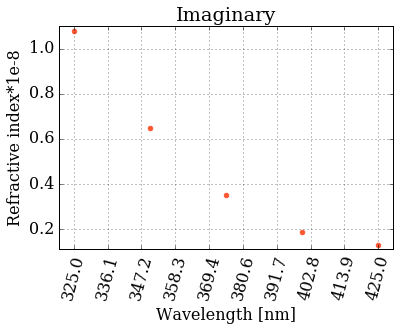

In [182]:
pyplot.scatter(lambda_w[5:10],k_w[5:10]*1e8, color='#ff5733') 
    
pyplot.xlabel('Wavelength [nm]')
pyplot.ylabel('Refractive index*1e-8')
pyplot.xlim(min(lambda_w[5:10])-5, max(lambda_w[5:10])+5)
pyplot.ylim(min(k_w[5:10]*1e8)-0.02, max(k_w[5:10]*1e8)+0.02)
#pyplot.yticks(numpy.linspace(min(k_w[10:15])*1e6, max(k_w[10:15])*1e6, 10))
pyplot.xticks(numpy.linspace(min(lambda_w[5:10]), max(lambda_w[5:10]), 10), rotation=75)
pyplot.title('Imaginary')
pyplot.grid()

In [186]:
k_w[5:10]*1e8

array([ 1.08 ,  0.65 ,  0.35 ,  0.186,  0.13 ])

In [185]:
k_w[10:15]*1e8

array([ 0.102 ,  0.0935,  0.1   ,  0.132 ,  0.196 ])